# Разработка A/B-тестирования и анализ результатов



Автор: Екатерина Лощинская
Дата: 15.04.2025

### 1. Работа с историческими данными (EDA)

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Сохраним данные в датафрейм
sessions_history = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_history.csv')

In [3]:
# Выведем первые пять строк полученного датафрейма 
display(sessions_history.head())

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android


In [4]:
#Рассчитаем количество уникальных сессий session_id для каждого уникального пользователя user_id
sessions_per_user = (sessions_history.groupby('user_id')['session_id'].count()).sort_values(ascending=False)
sessions_per_user = sessions_per_user.reset_index()
display(sessions_per_user)

,user_id,session_id
0,10E0DEFC1ABDBBE0,10
1,6A73CB5566BB494D,10
2,8A60431A825D035B,9
3,D11541BAC141FB94,9
4,5BCFE7C4DCC148E9,9
...,...,...
134034,1DF13BB1953B3497,1
134035,628502A3CE7E0A3C,1
134036,1DEEF40DEFBD0C65,1
134037,AC08479B7472C628,1


In [5]:
# Выведем все данные для одного пользователя с наибольшим количеством сессий
user_max_sessions = sessions_per_user['user_id'].loc[0]
display(f'Пользователь с максимальным количеством сессий: {user_max_sessions}')

result_user = sessions_history[sessions_history['user_id'] == user_max_sessions]

display(result_user)

'Пользователь с максимальным количеством сессий: 10E0DEFC1ABDBBE0'

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


In [6]:
# Рассчитаем число уникальных пользователей и число зарегистрированных пользователей по дням
users_per_day = sessions_history.groupby('session_date')['user_id'].nunique()
users_per_day = users_per_day.reset_index()
reg_users_per_day = sessions_history[sessions_history['registration_flag'] == 1].groupby('session_date')['user_id'].nunique()
reg_users_per_day = reg_users_per_day.reset_index()
display(users_per_day.head(10))
display(reg_users_per_day.head(10))



,session_date,user_id
0,2025-08-11,3919
1,2025-08-12,6056
2,2025-08-13,8489
3,2025-08-14,10321
4,2025-08-15,14065
5,2025-08-16,12205
6,2025-08-17,11200
7,2025-08-18,10839
8,2025-08-19,12118
9,2025-08-20,13514


,session_date,user_id
0,2025-08-11,169
1,2025-08-12,336
2,2025-08-13,464
3,2025-08-14,625
4,2025-08-15,840
5,2025-08-16,916
6,2025-08-17,833
7,2025-08-18,860
8,2025-08-19,831
9,2025-08-20,1008


In [7]:
# Объединим датафреймы по дате для построения общего графика
users_dates = users_per_day.merge(reg_users_per_day, on ='session_date', how='left')
users_dates = users_dates.rename(columns={'user_id_x': 'users', 'user_id_y': 'registered_users'})
display(users_dates.head(10), users_dates.min(), users_dates.max())

,session_date,users,registered_users
0,2025-08-11,3919,169
1,2025-08-12,6056,336
2,2025-08-13,8489,464
3,2025-08-14,10321,625
4,2025-08-15,14065,840
5,2025-08-16,12205,916
6,2025-08-17,11200,833
7,2025-08-18,10839,860
8,2025-08-19,12118,831
9,2025-08-20,13514,1008


session_date        2025-08-11
users                      317
registered_users            32
dtype: object

session_date        2025-09-23
users                    17563
registered_users          1253
dtype: object

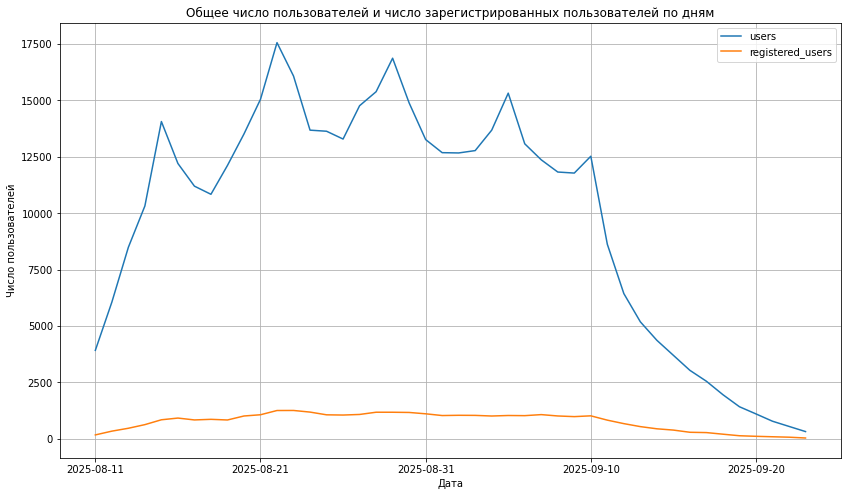

In [8]:
# Построим линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням

users_dates.plot(kind='line', x='session_date', y=['users', 'registered_users'], figsize=(14, 8))

# Настраиваем оси
plt.title('Общее число пользователей и число зарегистрированных пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Число пользователей')
plt.legend(loc='upper right')
#plt.xlim(users_dates['session_date'].min(), users_dates['session_date'].max())
plt.grid()
plt.show()

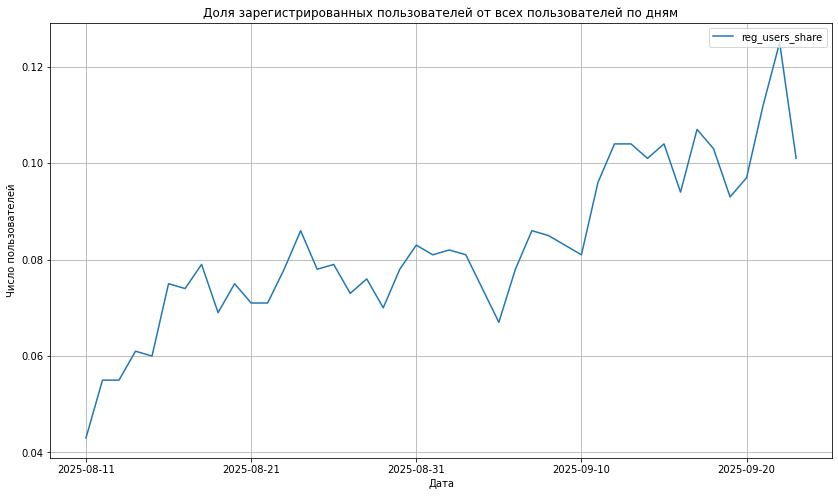

In [9]:
# Построим график доли зарегистрированных пользователей от всех пользователей по дням
users_dates['reg_users_share'] = round(users_dates['registered_users']/users_dates['users'],3)
users_dates.plot(kind='line', x='session_date', y=['reg_users_share'], figsize=(14, 8))
plt.title('Доля зарегистрированных пользователей от всех пользователей по дням')
plt.xlabel('Дата')         
plt.ylabel('Число пользователей')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.


In [10]:
# Количество сессий для каждого значения количества просмотренных страниц
sessions_per_page_counter = (sessions_history.groupby('page_counter')['session_id'].count()).sort_values(ascending=False)
#sessions_per_page_counter = sessions_per_page_counter.reset_index()
display(sessions_per_page_counter)

page_counter
3    166690
4    105569
2    105536
1     29160
5     26288
6      2589
7        92
Name: session_id, dtype: int64

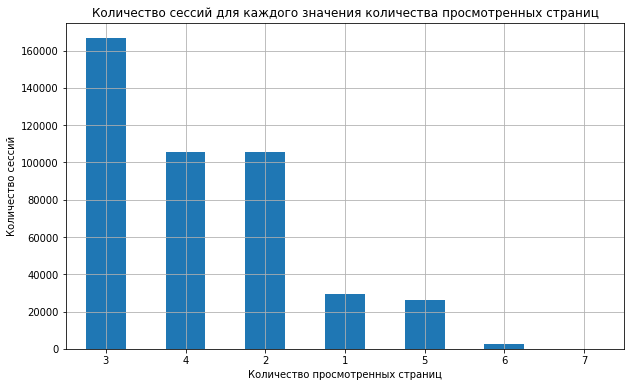

In [11]:
sessions_per_page_counter.plot.bar(legend= False, 
                title= 'Количество сессий для каждого значения количества просмотренных страниц',
                ylabel= 'Количество сессий', 
                xlabel= 'Количество просмотренных страниц',      
                rot=0,
                figsize=(10, 6))
plt.grid()
plt.show()

В качестве целевой метрики для оценки внесенных в приложение изменений использовано количество успешных сессий good_session. Успешной считается сессия, во время которой пользователь просмотрел 4 и более страниц. При анализе количества сессий для каждого значения просмотренных страниц, можно отметить, что чаще всего пользователи просматривают 3 страницы - 166690 сессий. Этот показатель ниже целевой метрики good_session. Далее по частоте следуют сессии с просмотрами 4 страниц (что равняется целевой метрике), 105569 сессий. Почти столько же сессий, в которых просмотрели 2 страницы. Только в небольшом количестве сессий просмотрено более 4 страниц, максимум - 7. Можно сделать вывод, что метрика выбрана правильно, просмотр более, чем 3 страниц действительно встречается не так часто и говорит об изменении обычного поведения пользователя.

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.



In [12]:
# Создадим дополнительный столбец good_session
sessions_history['good_session'] = 0
sessions_history['good_session'] = (sessions_history['page_counter'] >= 4).astype(int)

display(sessions_history.head())

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,good_session
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone,0
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android,1
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC,1
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android,1
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android,0


,session_date,session_id,good_session
0,2025-08-11,3919,0.312835
1,2025-08-12,6056,0.302015
2,2025-08-13,8489,0.306750
3,2025-08-14,10321,0.316055
4,2025-08-15,14065,0.304941


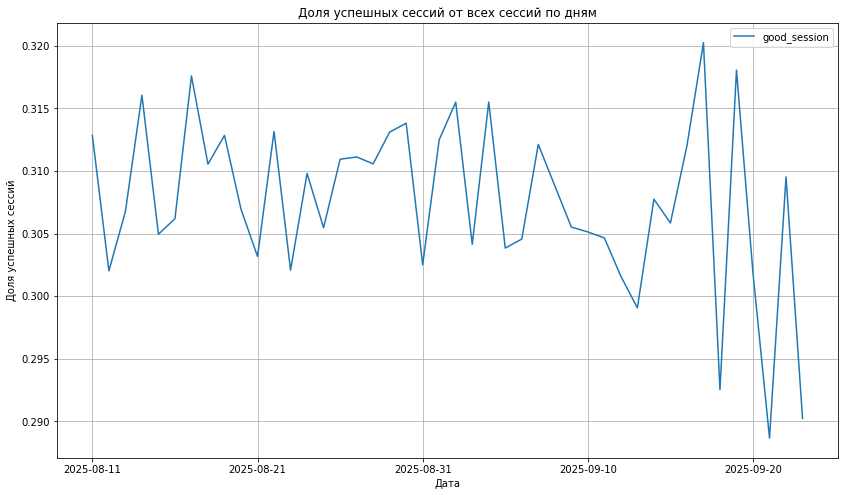

In [13]:
# Посчитаем количество сессий и количество успешных сессий по дням
sessions_per_day = sessions_history.groupby('session_date')['session_id'].count()
sessions_per_day = sessions_per_day.reset_index()
#good_sessions = sessions_history[sessions_history['good_session'] == 1].groupby('session_date')['session_id'].count()
good_sessions = sessions_history.groupby('session_date').agg({'good_session' : 'mean'})
good_sessions = good_sessions.reset_index()
#display(good_sessions)

# Объединим данные в одну таблицу
sessions_dates = sessions_per_day.merge(good_sessions, on ='session_date', how='left')
display(sessions_dates.head())
sessions_dates = sessions_dates.rename(columns={'session_id_x': 'total_sessions', 'session_id_y': 'good_sessions'})
#display(sessions_dates.head())

# Найдем долю успешных сессий от общего числа
#sessions_dates['good_sessions_share'] = sessions_dates['good_sessions']/sessions_dates['total_sessions']
#display(sessions_dates.head())

# Построим график
sessions_dates.plot(kind='line', x='session_date', y=['good_session'], figsize=(14, 8))
plt.title('Доля успешных сессий от всех сессий по дням')
plt.xlabel('Дата')         
plt.ylabel('Доля успешных сессий')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#### 2.1. Расчёт размера выборки


In [14]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05 
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.03 # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


#### 2.1. Расчёт длительности A/B-теста



In [15]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = sessions_history.groupby('session_date')['user_id'].nunique().mean()

# Рассчитываем длительность теста в днях как отношение размера выборки к среднему числу пользователей
test_duration = ceil(sample_size / (avg_daily_users / 2))

print(f"Рассчитанная длительность A/B-теста при текущем уровене трафика в {round(avg_daily_users)} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907 пользователей в день составит 4 дней


### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей



In [16]:
# Сохраним данные в датафрейм
sessions_test_part = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test_part.csv')
display(sessions_test_part.head())

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B
1,3A2BF4D364E62D89,216FC619308F8788,2025-10-14,2025-10-14 21:11:04,2025-10-14,1,0,3,MENA,iPhone,A
2,79CDAE11E32B1597,EDFCE4AC1A504074,2025-10-14,2025-10-14 21:44:03,2025-10-14,1,0,3,CIS,iPhone,A
3,D6AF8D78297A931F,CF0AC0EEDE92C690,2025-10-14,2025-10-14 19:07:55,2025-10-14,1,0,4,CIS,PC,A
4,37E0CE723AE568E0,2E6ED45E8C86C4E9,2025-10-14,2025-10-14 15:39:44,2025-10-14,1,0,3,CIS,Mac,B


In [17]:
# Рассчитаем количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения
group_a = sessions_test_part.loc[sessions_test_part['test_group'] == 'A']
group_b = sessions_test_part.loc[sessions_test_part['test_group'] == 'B']

users_a = group_a['user_id'].nunique()/sessions_test_part[sessions_test_part['test_group'] == 'A'].groupby('test_group')['session_date'].nunique()
users_a = users_a.reset_index()
users_b = group_b['user_id'].nunique()/sessions_test_part[sessions_test_part['test_group'] == 'B'].groupby('test_group')['session_date'].nunique()
users_b = users_b.reset_index()
users_a_daily = users_a.iloc[0, 1]
users_b_daily = users_b.iloc[0, 1]

display(f'Количество уникальных пользователей в день в группе А: {users_a_daily}')
display(f'Количество уникальных пользователей в день в группе В: {users_b_daily}')

'Количество уникальных пользователей в день в группе А: 1477.0'

'Количество уникальных пользователей в день в группе В: 1466.0'

In [18]:
# Рассчитаем процентную разницу в количестве пользователей в группах A и B
prcnt_diff = round ((100 * ((users_a_daily - users_b_daily) / users_a_daily)), 2)

print(f'Процентная разница в количестве пользователей в группах A и B: {prcnt_diff}')

Процентная разница в количестве пользователей в группах A и B: 0.74


   users_daily index
0       1477.0     A
1       1466.0     B


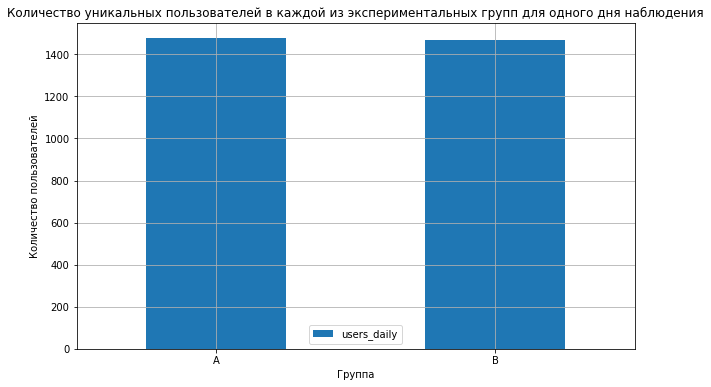

In [19]:
data = {'users_daily': [users_a_daily, users_b_daily]}
df = pd.DataFrame(data)
df['index'] = ['A', 'B']
print(df)

df.plot.bar(x = 'index', y = 'users_daily',
                title= 'Количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения',
                ylabel= 'Количество пользователей', 
                xlabel= 'Группа',      
                rot=0,
                figsize=(10, 6))

plt.grid()
plt.show()

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

In [20]:
# Найдем уникальные id пользователей каждой группы
a_users = sessions_test_part.loc[sessions_test_part['test_group'] == 'A']
a_users_id = a_users['user_id'].unique()

b_users = sessions_test_part.loc[sessions_test_part['test_group'] == 'B']
b_users_id = b_users['user_id'].unique()

# Создадим множества и проверим их пересечение
a_set = set(a_users_id)
b_set = set(b_users_id)

print(a_set.intersection(b_set)) 


set()


Множества пользователей групп A и В не пересекаются.

#### 3.3. Равномерность разделения пользователей по устройствам



In [21]:
# Сгруппируем пользователей по типу устройства в каждой из групп

device_group_a = a_users.groupby('device')['user_id'].nunique().sort_values(ascending=True)
device_group_a = device_group_a.reset_index()
device_group_a['total'] = a_users.groupby('device')['user_id'].nunique().sum()
device_group_a['share'] = round((device_group_a['user_id'] / device_group_a['total']), 2)
print('Группа А')
display(device_group_a)
device_group_b = b_users.groupby('device')['user_id'].nunique().sort_values(ascending=True)
device_group_b = device_group_b.reset_index()
device_group_b['total'] = b_users.groupby('device')['user_id'].nunique().sum()
device_group_b['share'] = round((device_group_b['user_id'] / device_group_b['total']), 2)
print('Группа В')
display(device_group_b)

Группа А


,device,user_id,total,share
0,Mac,156,1477,0.11
1,iPhone,296,1477,0.20
2,PC,369,1477,0.25
3,Android,656,1477,0.44


Группа В


,device,user_id,total,share
0,Mac,148,1466,0.10
1,iPhone,269,1466,0.18
2,PC,381,1466,0.26
3,Android,668,1466,0.46


In [22]:
# Построим диаграммы

#device_group_a.plot.barh(legend= True, 
                        #x = 'device',
                        #y = 'share',
                        #title= 'Доля каждого типа устройства для пользователей из группы A',
                        #xlabel= 'Тип устройства',      
                        #rot=0,
                        #figsize=(10, 6))
#plt.grid()
#plt.show()


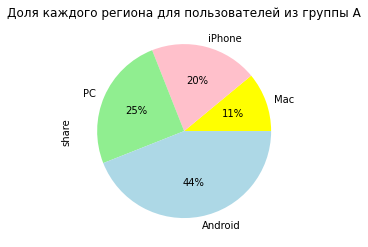

In [23]:
device_group_a['share'].plot(
    kind="pie",
    autopct='%.0f%%',
    labels = device_group_a['device'],
    title='Доля каждого региона для пользователей из группы A',
    colors = ['yellow', 'pink', 'lightgreen', 'lightblue'])

plt.show()

In [24]:
#device_group_b.plot.barh(legend= True, 
                        #x = 'device',
                        #y = 'share',
                        #title= 'Доля каждого типа устройства для пользователей из группы B',
                        #xlabel= 'Тип устройства',      
                        #rot=0,
                        #figsize=(10, 6))
#plt.grid()
#plt.show()

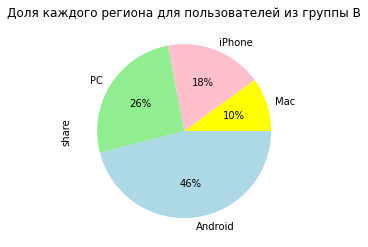

In [25]:
device_group_b['share'].plot(
    kind="pie",
    autopct='%.0f%%',
    labels = device_group_b['device'],
    title='Доля каждого региона для пользователей из группы B',
    colors = ['yellow', 'pink', 'lightgreen', 'lightblue'])

plt.show()

#### 3.4. Равномерность распределения пользователей по регионам



In [26]:
# Сгруппируем пользователей по региону в каждой из групп

region_group_a = a_users.groupby('region')['user_id'].nunique().sort_values(ascending=False)
region_group_a = region_group_a.reset_index()
region_group_a['total'] = a_users.groupby('region')['user_id'].nunique().sum()
region_group_a['region_share'] = round((region_group_a['user_id'] / region_group_a['total']), 2)
print('Группа А')
display(region_group_a)
region_group_b = b_users.groupby('region')['user_id'].nunique().sort_values(ascending=False)
region_group_b = region_group_b.reset_index()
region_group_b['total'] = b_users.groupby('region')['user_id'].nunique().sum()
region_group_b['region_share'] = round((region_group_b['user_id'] / region_group_b['total']), 2)
print('Группа В')
display(region_group_b)

Группа А


,region,user_id,total,region_share
0,CIS,644,1477,0.44
1,MENA,609,1477,0.41
2,EU,224,1477,0.15


Группа В


,region,user_id,total,region_share
0,CIS,645,1466,0.44
1,MENA,604,1466,0.41
2,EU,217,1466,0.15


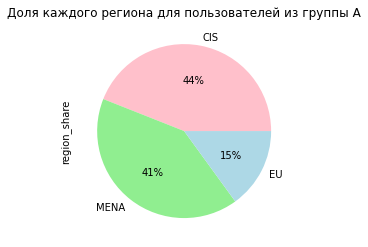

In [27]:
region_group_a['region_share'].plot(
    kind="pie",
    autopct='%.0f%%',
    labels = region_group_a['region'],
    title='Доля каждого региона для пользователей из группы A',
    colors = ['pink', 'lightgreen', 'lightblue'])

plt.show()

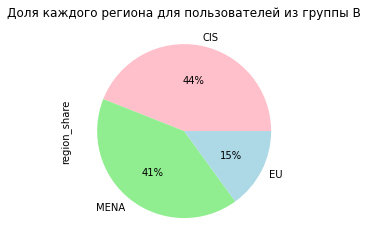

In [28]:
region_group_b['region_share'].plot(
    kind="pie",
    autopct='%.0f%%',
    labels = region_group_b['region'],
    title='Доля каждого региона для пользователей из группы B',
    colors = ['pink', 'lightgreen', 'lightblue'])

plt.show()

#### 3.5. Вывод после проверки A/B-теста


После запуска А/В теста было подсчитано количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения. Количество уникальных пользователей в день в группе А составило 1477, а в группе В 1466 человек.
Была подсчитана процентная разница в количестве пользователей в группах A и B, она составила 0.74%. Различие в количестве пользователей в двух группах незначительно. 

Для проверки независимости групп А и В исследовано пересечение множеств из тестовой и контрольной групп. Пересечения множеств не выявлено, группы А и В можно считать независимыми.

Можно сделать вывод о том, что сохраняется равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам. Доля пользователей по устройствам в двух группах различается не более, чем на 0.02%: Mac	0.11/0.10; iPhone 0.20/0.18; PC 0.25/0.26; Android 0.44/0.46 (указаны через '/' для групп А и В).
 Доли пользователей по регионам полностью совпадают для тестовой и контрольной групп (CIS - 44%, MENA - 41%, EU - 15%).


### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики


In [29]:
# Сохраним данные в датафрейм и добавим дополнительный столбец
sessions_test = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test.csv')
sessions_test['good_session'] = 0
sessions_test['good_session'] = (sessions_test['page_counter'] >= 4).astype(int)
display(sessions_test.head())


,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0


In [30]:
# Разделим на группы 
group_a = sessions_test.loc[sessions_test['test_group'] == 'A']
group_b = sessions_test.loc[sessions_test['test_group'] == 'B']
display(group_a.head())
display(group_b.head())

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
7,457F2674E87EF6E7,14F71C18BE2CEC08,2025-10-19,2025-10-19 11:49:11,2025-10-19,1,0,3,MENA,Mac,A,0
8,57F342451921D207,76EFA055599ADE3C,2025-10-19,2025-10-19 18:47:43,2025-10-19,1,0,3,CIS,PC,A,0
13,504F268CCCDB2CA9,2879394D4E1AB0A2,2025-10-17,2025-10-17 17:00:45,2025-10-17,1,0,3,CIS,iPhone,A,0


,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0
5,31F7A42B32103403,E9B64B779C3348ED,2025-10-20,2025-10-20 17:09:41,2025-10-19,2,0,2,CIS,PC,B,0
6,87C09E3E3B334959,FECFF83C13DC9364,2025-10-22,2025-10-22 23:51:42,2025-10-20,3,0,4,CIS,iPhone,B,1


#### 4.2. Проверка корректности результатов теста



In [31]:
# Количество уникальных сессий по дням
sessions_per_day = sessions_test.groupby('session_date')['session_id'].nunique()
sessions_per_day = sessions_per_day.reset_index()
display(sessions_per_day.head())

,session_date,session_id
0,2025-10-14,3130
1,2025-10-15,4518
2,2025-10-16,6521
3,2025-10-17,8143
4,2025-10-18,10072


In [32]:
# Количество сессий по группам
a_sessions_per_day = group_a.groupby('session_date')['session_id'].nunique()
a_sessions_per_day = a_sessions_per_day.reset_index()
print('Группа А')
display(a_sessions_per_day.head())

Группа А


,session_date,session_id
0,2025-10-14,1502
1,2025-10-15,2235
2,2025-10-16,3280
3,2025-10-17,4089
4,2025-10-18,5013


In [33]:
b_sessions_per_day = group_b.groupby('session_date')['session_id'].nunique()
b_sessions_per_day = b_sessions_per_day.reset_index()
print('Группа B')
display(b_sessions_per_day.head())

Группа B


,session_date,session_id
0,2025-10-14,1628
1,2025-10-15,2283
2,2025-10-16,3241
3,2025-10-17,4054
4,2025-10-18,5059


Проведем тест Стьюдента для ответа на вопрос, есть ли значимые различия в количестве сессий в двух группах.
Нулевая гипотеза: Количество уникальных дневных сессий в двух выборках значимо не различается.
Альтернативная гипотеза: Количество уникальных дневных сессий в двух выборках значимо различается.

In [34]:


from scipy.stats import ttest_ind

# Фиксируем уровень значимости
alpha = 0.05

stat_ttest, p_value_ttest = ttest_ind( # Применяем тест Стьюдента (классический T-test)
    a_sessions_per_day['session_id'], 
    b_sessions_per_day['session_id'], 
    alternative='two-sided' 
)
pvalue=round(p_value_ttest, 4)

if pvalue > alpha:
    print(f'pvalue={pvalue} > {alpha}')
    print('Подтверждается нулевая гипотеза. Различие количества уникальных дневных сессий в двух выборках не является статистически значимым.')
else:
    print(f'pvalue={pvalue} < {alpha}')
    print('Нулевая гипотеза не подтверждается. Различие количества уникальных дневных сессий в двух выборках является статистически значимым.')

pvalue=0.9382 > 0.05
Подтверждается нулевая гипотеза. Различие количества уникальных дневных сессий в двух выборках не является статистически значимым.


#### 4.3. Сравнение доли успешных сессий



In [35]:
# Доля успешных сессий по группам
good_session_share = sessions_test.groupby('test_group')['good_session'].mean().round(4)
good_session_share = good_session_share.reset_index()
#print(good_session_share)
good_session_share_a = good_session_share.iloc[0, 1]
good_session_share_b = good_session_share.iloc[1, 1]
print(f'Доля успешных сессий в группе А: {good_session_share_a}')
print(f'Доля успешных сессий в группе B: {good_session_share_b}')


Доля успешных сессий в группе А: 0.3077
Доля успешных сессий в группе B: 0.3183


    share index
0  0.3077     A
1  0.3183     B


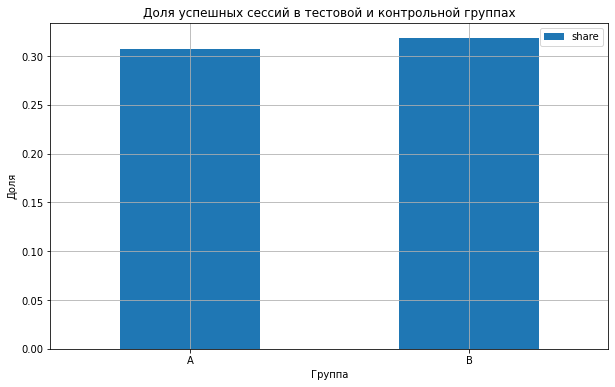

In [36]:
data = {'share': [good_session_share_a, good_session_share_b]}
df = pd.DataFrame(data)
df['index'] = ['A', 'B']
print(df)

df.plot.bar(x = 'index', y = 'share',
                title= 'Доля успешных сессий в тестовой и контрольной группах',
                ylabel= 'Доля', 
                xlabel= 'Группа',      
                rot=0,
                figsize=(10, 6))

plt.grid()
plt.show()

In [37]:
# Разница доли успешных сессий для выборок A и B
good_session_diff = round((good_session_share_b - good_session_share_a) * 100, 1)
print(f'Разница доли успешных сессий для выборок A и B: {good_session_diff}%.')

Разница доли успешных сессий для выборок A и B: 1.1%.


#### 4.4. Насколько статистически значимо изменение ключевой метрики



In [38]:
# Используем Z-тест пропорций
from statsmodels.stats.proportion import proportions_ztest

# Все сессии
total = sessions_test.groupby('test_group')['session_id'].nunique()
total = total.reset_index()
n_a = total.iloc[0,1]
n_b = total.iloc[1,1]
# Успешные сессии
good_sessions = sessions_test.groupby('test_group')['good_session'].sum()
good_sessions = good_sessions.reset_index()
m_a = good_sessions.iloc[0,1]
m_b = good_sessions.iloc[1,1]

alpha = 0.05 # уровень значимости

stat_ztest, p_value_ztest = proportions_ztest(
    [m_a, m_b],
    [n_a, n_b],
    alternative='smaller'
)

if p_value_ztest > alpha:
    print(f'pvalue={round(p_value_ztest, 5)} > {alpha}')
    print('Нулевая гипотеза находит подтверждение. Доли успешных сессий в группах А и В значимо не различаются.')
else:
    print(f'pvalue={round(p_value_ztest, 5)} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения. Доли успешных сессий в группах А и В значимо различаются.')

pvalue=0.00016 < 0.05
Нулевая гипотеза не находит подтверждения. Доли успешных сессий в группах А и В значимо различаются.


#### 4.5. Вывод по результатам A/B-эксперимента


В ходе проекта исследовано А/В тестирование нового алгоритма рекомендаций в приложении.

На первом этапе для изучения продукта было исследовано число зарегистрированных пользователей по историческим данным. Подсчитано число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения.
Общее число пользователей по дням меняется в широких пределах от 317 до 17563. Число зарегистрированных пользователей меняется не в таких широких пределах, минимальное количество - 32, максимальное - 1253. 

Добавлен новый столбец good_session, в котором значение 1 присвоено сессиям, за которые просмотрено 4 и более страниц, прочим сессиям присвоено значение 0. График 'Доля успешных сессий от всех сессий по дням' демонстрирует, что минимальная доля успешных сессий составила 29%, максимальная - 32%.

Для расчета размера выборки для эксперимента использован метод solve_power() из класса power.NormalIndPower модуля statsmodels.stats.

Необходимый размер выборки для каждой группы составил 17441 человек. Рассчитанная длительность A/B-теста при текущем уровене трафика в 9907 пользователей в день составила 4 дня.


При мониторинге А/В теста расчитано, что количество уникальных пользователей в день в группе А составило 1477 человек, в группе В - 1466 человек. Была подсчитана процентная разница в количестве пользователей в группах A и B, она составила 0.74%. Различие в количестве пользователей в двух группах незначительно.

Для проверки независимости групп А и В исследовано пересечение множеств из тестовой и контрольной групп. Пересечения множеств не выявлено, группы А и В можно считать независимыми.

Можно сделать вывод о том, что сохраняется равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам. Доля пользователей по устройствам в двух группах различается не более, чем на 0.02%: Mac 0.11/0.10; iPhone 0.20/0.18; PC 0.25/0.26; Android 0.44/0.46 (указаны через '/' для групп А и В). Доли пользователей по регионам полностью совпадают для тестовой и контрольной групп (CIS - 44%, MENA - 41%, EU - 15%).

Для проверки корректности теста и сопостовимости тестовой и контрольной групп проведён тест Стьюдента. Нулевая гипотеза состояла в том, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. 
Pvalue составила 0.9382 при уровне значимости теста 0.05.
Подтверждается нулевая гипотеза. Различие количества уникальных дневных сессий в двух выборках не является статистически значимым.


Для анализа ключевой метрики — доли успешных сессий - рассчитана доля успешных сессий для выборок A и B, а также разница в этом показателе. Доля успешных сессий составила 30,77% в группе A, 31,83% в группе В. B тестовой выборке количество успешных сессий примерно на 1.1% выше, чем в контрольной. Для принятия решения о том, является ли это изменение статистически значимым, проведен 
Z-тест пропорций. Pvalue=0.00016 при уровне значимости теста 0.05. Нулевая гипотеза не находит подтверждения. Доли успешных сессий в группах А и В статистически значимо различаются. Можно рекомендовать внедрение нововведения в приложение.
